In [ ]:
import os
from PIL import Image
from transformers import pipeline
from datasets import load_dataset
import torch
import requests
import matplotlib.pyplot as plt

In [ ]:
from huggingface_hub import login
login(token="your HF token value")

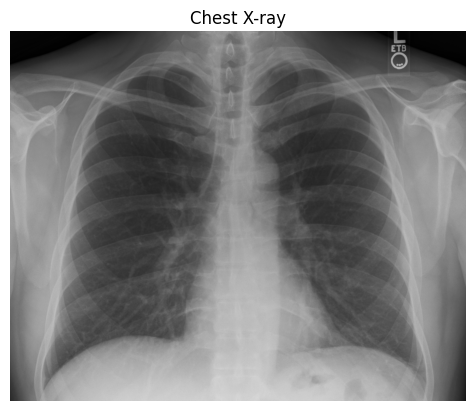

In [14]:
pipe = pipeline(
    "image-text-to-text",
    model="google/medgemma-4b-it",
    device="cpu",
)

image_url = "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"
image = Image.open(requests.get(image_url, headers={"User-Agent": "example"}, stream=True).raw)

# Visualize the image inline
plt.imshow(image)
plt.axis("off")
plt.title("Chest X-ray")
plt.show()

# Prepare prompt messages
messages = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": (
                "You are an expert radiologist and oncologist. "
                "Analyze the X-ray carefully to detect cancer, "
                "identify the organ involved, estimate the stage if cancer is present, "
                "give a detailed diagnostic report, and recommend patient management."
            )}
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Please analyze this X-ray and provide a detailed cancer diagnosis."},
            {"type": "image", "image": image}
        ]
    }
]


In [12]:
# Generate diagnostic report using MedGemma pipeline
print("\n=== Detailed Diagnostic Report ===\n")
output = pipe(messages, max_new_tokens=200)
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


As an AI, I am unable to provide a definitive diagnosis based on a single X-ray image. A comprehensive diagnosis requires a detailed clinical history, physical examination, and potentially other imaging studies or biopsies.

However, I can provide a general interpretation of the X-ray image and outline the typical findings associated with certain conditions.

**General Appearance:**

The X-ray shows a standard anteroposterior (AP) chest radiograph. The lungs appear relatively clear, with no obvious consolidation or large masses. The heart size is within normal limits. The mediastinum (the space between the lungs containing the heart, great vessels, trachea, and esophagus) appears unremarkable.

**Potential Findings and Considerations:**

*   **Lung Cancer:** While the current image does not definitively show lung cancer, it is important to consider this possibility, especially if there is a history of smoking or exposure to other risk factors. Lung cancer can manifest as a mass, nodule

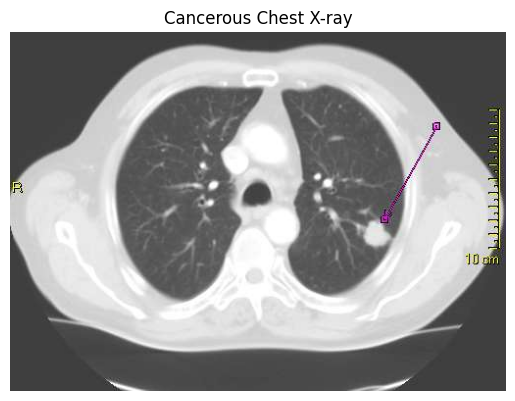

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.



=== Detailed Diagnostic Report ===

Okay, I will analyze the provided X-ray and provide a detailed report.

**Image Description:**

The image appears to be a cross-sectional view of the chest, likely from a CT scan. It shows the lungs, heart, and mediastinum (the space between the lungs containing the heart, major blood vessels, trachea, esophagus, and lymph nodes). A nodule is present in the right lung field, near the hilum.

**Findings:**

*   **Nodule in Right Lung:** A well-defined, round nodule is observed in the right lung field, close to the hilum. This nodule appears to have a homogeneous density, suggesting it may be a solid mass.
*   **Normal Lung Tissue:** The surrounding lung tissue appears relatively normal. No widespread consolidation, edema, or other significant abnormalities are immediately apparent.
*   **Mediastinal Structures:** The mediastinal structures (heart, great vessels, trachea) appear unremarkable on this slice


In [17]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Thorax_CT_peripheres_Brronchialcarcinom_li_OF.jpg"
image = Image.open(requests.get(image_url, headers={"User-Agent": "example"}, stream=True).raw)

# Visualize the image inline
plt.imshow(image)
plt.axis("off")
plt.title("Cancerous Chest X-ray")
plt.show()

# Prepare prompt messages
messages = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": (
                "You are an expert radiologist and oncologist. "
                "Analyze the X-ray carefully to detect cancer, "
                "identify the organ involved, estimate the stage if cancer is present, "
                "give a detailed diagnostic report, and recommend patient management."
            )}
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Please analyze this X-ray and provide a detailed cancer diagnosis."},
            {"type": "image", "image": image}
        ]
    }
]

# Generate diagnostic report using MedGemma pipeline
print("\n=== Detailed Diagnostic Report ===\n")
output = pipe(messages, max_new_tokens=200)
print(output[0]["generated_text"][-1]["content"])